In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('stock_prices.csv')
prices = data['Close'].values.reshape(-1,1)

In [3]:
sc = MinMaxScaler()
sc_price = sc.fit_transform(prices)

In [4]:
def create_sequences(data, seq_l):
    X, y = [], []
    for i in range(len(data) - seq_l):
        X.append(data[i : i + seq_l])
        y.append(data[i + seq_l])
    return np.array(X), np.array(y)

In [5]:
seq_l = 10
X,y = create_sequences(sc_price,seq_l)

In [6]:
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [7]:
model = Sequential([
    LSTM(50, input_shape=(seq_l, 1)),
    Dense(1)])
model.compile(optimizer='adam', loss='mean_squared_error')


C:\Users\TUG GAMING\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.2141 - val_loss: 0.1049
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0140 - val_loss: 0.0130
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - val_loss: 0.0151
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - val_loss: 0.0020
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - val_loss: 0.0020
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.6955e-04 - val_loss: 0.0022
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.5353e-04 - val_loss: 0.0024
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.1498e-04 - val_loss: 0.0022
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.0515e-04 - val_loss: 0.0026
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.6816e-04 - val_loss: 0.0022
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - 

In [9]:
loss = model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0035 


In [10]:
predictions = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


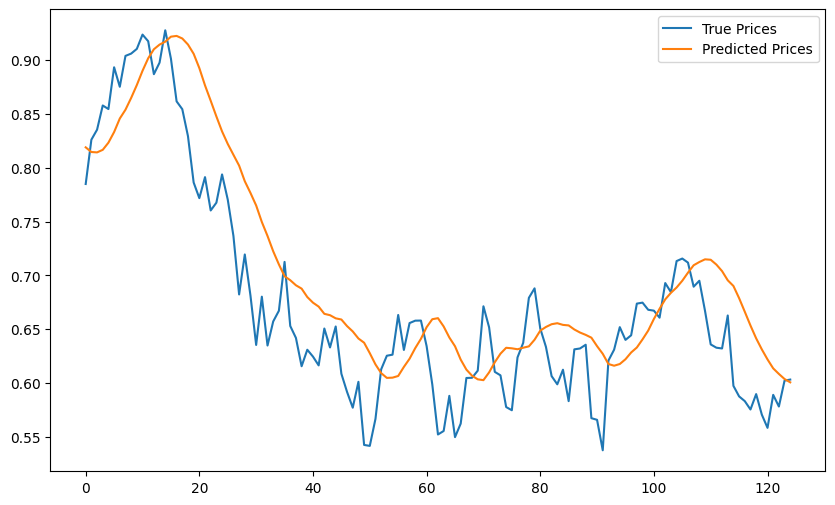

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Prices')
plt.plot(predictions, label='Predicted Prices')
plt.legend()
plt.show()